In [ ]:
from google.colab import drive
drive.mount("/content/drive")

MessageError: ignored

In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torchvision.datasets import STL10
from torchvision.transforms import ToTensor
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torchvision import datasets
from sklearn.model_selection import StratifiedShuffleSplit
import collections
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
#path to store/load data
dataset = STL10(root="/content/drive/MyDrive/data", download = False, transform=ToTensor())
test_dataset = STL10(root="/content/drive/MyDrive/data", split="test", transform=ToTensor())
dataset_size = len(dataset)
train_ds = dataset

test_dataset_size = len(test_dataset)
classes = dataset.classes
num_classes = len(classes)

print(dataset_size, train_ds.data.shape, test_dataset_size)
print(classes, num_classes)



  0%|          | 0/2640397119 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/data/stl10_binary.tar.gz to /content/drive/MyDrive/data
5000 (5000, 3, 96, 96) 8000
['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck'] 10


In [ ]:
def show_example(img, label):
  print("Label: ", dataset.classes[label], "("+str(label)+")")
  plt.imshow(img.permute(1,2,0))


Label:  bird (1)


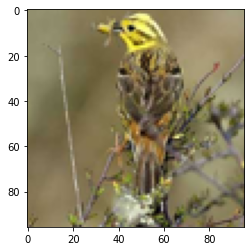

In [ ]:
show_example(*dataset[0])

In [ ]:
count_class = {}
for _, outs in dataset:
  labels = classes[outs]
  if labels not in count_class:
    count_class[labels] = 0
  count_class[labels] += 1
print(count_class)    

{'bird': 500, 'dog': 500, 'horse': 500, 'cat': 500, 'truck': 500, 'monkey': 500, 'deer': 500, 'ship': 500, 'airplane': 500, 'car': 500}


In [ ]:
img, label = dataset[0]
print(img.shape, label)
print(img)

torch.Size([3, 96, 96]) 1
tensor([[[0.5725, 0.5725, 0.5725,  ..., 0.6353, 0.6353, 0.6353],
         [0.5725, 0.5725, 0.5725,  ..., 0.6392, 0.6392, 0.6392],
         [0.5725, 0.5725, 0.5725,  ..., 0.6431, 0.6431, 0.6431],
         ...,
         [0.5098, 0.5176, 0.4588,  ..., 0.5373, 0.5882, 0.5529],
         [0.5255, 0.6078, 0.3451,  ..., 0.5294, 0.5333, 0.5373],
         [0.5294, 0.3804, 0.4549,  ..., 0.5412, 0.5765, 0.5412]],

        [[0.5608, 0.5608, 0.5608,  ..., 0.6235, 0.6235, 0.6235],
         [0.5608, 0.5608, 0.5608,  ..., 0.6196, 0.6196, 0.6196],
         [0.5608, 0.5608, 0.5608,  ..., 0.6196, 0.6196, 0.6196],
         ...,
         [0.4471, 0.4667, 0.4078,  ..., 0.5176, 0.5412, 0.4784],
         [0.4627, 0.5529, 0.2902,  ..., 0.5137, 0.4863, 0.4706],
         [0.4667, 0.3255, 0.4078,  ..., 0.4980, 0.5333, 0.5020]],

        [[0.4314, 0.4314, 0.4314,  ..., 0.4941, 0.4941, 0.4941],
         [0.4314, 0.4314, 0.4314,  ..., 0.4941, 0.4941, 0.4941],
         [0.4314, 0.4314, 0.4314

In [ ]:
from torch.utils.data import Subset
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
                             random_state = 2)

indices = list(range(len(test_dataset)))
y_test0 = [y for _,y in test_dataset]
for test_index, val_index in sss.split(indices, y_test0):
  print("test:", test_index, "val", val_index)
  print(len(val_index), len(test_index))

#splitting the testdataset into validation and testing dataset
valid_ds = Subset(test_dataset, val_index)
test_ds = Subset(test_dataset, test_index)

y_test = [y for _,y in test_ds]
y_val = [y for _,y in valid_ds]

counter_test = collections.Counter(y_test)
counter_val = collections.Counter(y_val)
print(counter_test)
print(counter_val)




test: [2780 4240  172 ...  261 2892 4068] val [4691 2830 4133 ... 5375  234  994]
1600 6400
Counter({7: 640, 8: 640, 4: 640, 1: 640, 3: 640, 9: 640, 5: 640, 0: 640, 2: 640, 6: 640})
Counter({6: 160, 8: 160, 7: 160, 4: 160, 2: 160, 0: 160, 5: 160, 3: 160, 1: 160, 9: 160})


image indices: [3392 2303 2325 2064]
torch.Size([3, 100, 394])


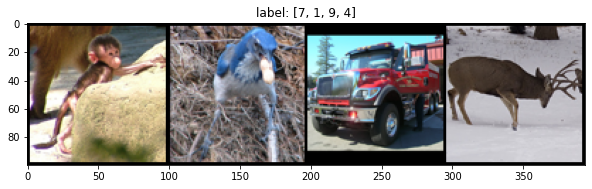

In [ ]:
from torchvision import utils

np.random.seed(43)

def show(img, y=None, color=True):
  npimg = img.numpy()  #from torch to np array
  npimg_tr = np.transpose(npimg, (1,2,0))
  plt.imshow(npimg_tr)
  if y is not None:
    plt.title("label: "+ str(y))

grid_size =4
rnd_inds = np.random.randint(0, len(train_ds), grid_size)
print("image indices:", rnd_inds)

x_grid = [train_ds[i][0] for i in rnd_inds]
y_grid = [train_ds[i][1] for i in rnd_inds]

x_grid = utils.make_grid(x_grid, nrow=4, padding=2)
print(x_grid.shape)

#call helper function
plt.figure(figsize=(10,10))
show(x_grid, y_grid)


In [ ]:
#RBG normalization and data augmentation

meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x,_ in train_ds]
stdRGB = [np.std(x.numpy(), axis=(1,2)) for x,_ in train_ds]

meanR = np.mean([m[0] for m in meanRGB])
meanG = np.mean([m[1] for m in meanRGB])
meanB = np.mean([m[2] for m in meanRGB])

stdR = np.std([s[0] for s in meanRGB])
stdG = np.std([s[1] for s in meanRGB])
stdB = np.std([s[2] for s in meanRGB])

print(meanR, meanG, meanB)
print(stdR, stdG, stdB)


0.4467106 0.43980986 0.40664646
0.11703536 0.11376934 0.1367649


In [ ]:
from torchvision.transforms.transforms import RandomHorizontalFlip
#data transforms (normalization and augmentation)
stats = ((meanR,meanG,meanB),(stdR,stdG,stdB))
train_tfms = tt.Compose([tt.RandomHorizontalFlip(p=0.5),
                         tt.RandomVerticalFlip(p=0.5),
                         tt.ToTensor(),
                         tt.Normalize(*stats, inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])




In [ ]:
#pytorch datasets
train_ds.transform = train_tfms
valid_ds.transform = valid_tfms


In [ ]:
batch_size = 300

In [ ]:
from torch.nn.modules.module import T
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size=batch_size*2, num_workers=2, pin_memory=True)


In [ ]:
def denormalize(images, means, stds):
  means = torch.tensor(means).reshape(1,3,1,1)
  stds = torch.tensor(stds).reshape(1,3,1,1)
  return images*stds + means

def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize=(12,12))
    ax.set_xticks([])
    ax.set_yticks([])
    denorm_images = denormalize(images, *stats)
    ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1,2,0).clamp(0,1))
    break


In [ ]:
def get_default_device():
  """pick gpu if available else cpu"""
  if torch.cuda.is_available():
    return torch.device("cuda")
  else:
    return torch.device("cpu")

def to_device(data, device):
  """move tensors to chosen device"""
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)

class DeviceDataLoader():
  """wrap a dataloader to move data to a device"""
  def __init__(self, dl, device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    """yield a batch of data after moving it to device"""
    for b in self.dl:
      yield to_device(b, self.device)  

  def __len__(self):
    """Number of batches"""
    return len(self.dl)
    

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [ ]:
from torch.nn.modules import padding
class SimpleResidualBLock(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
    self.relu1 = nn.ReLU()
    self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
    self.relu2 = nn.ReLU()

  def forward(self, x):
    out = self.conv1(x)
    out = self.relu1(out)
    out = self.conv2(out)
    return self.relu2(out) + x   #relu can be applied before or after adding x


In [ ]:
simple_resnet = to_device(SimpleResidualBLock(), device)

for images, labels in train_dl:
  out = simple_resnet(images)
  print(out.shape)
  break

del simple_resnet, images, labels
torch.cuda.empty_cache()  

torch.Size([300, 3, 96, 96])


In [ ]:
def accuracy(outputs, labels):
  _,preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds==labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return {"val_loss": loss.detach(), "val_acc": acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x["val_loss"] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x["val_acc"] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {"val_loss": epoch_loss.item(), "val_acc": epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f},"
    "val_acc: {:.4f}".format(
        epoch, result["lrs"][-1], result["train_loss"], result["val_loss"], result["val_acc"]))
      


In [ ]:
def conv_block(in_channels, out_channels, pool=False):
  layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)]
  if pool: layers.append(nn.MaxPool2d(2))
  return nn.Sequential(*layers)

class Resnet9(ImageClassificationBase):
  def __init__(self, in_channels, num_classes):
    super().__init__()

    self.conv1 = conv_block(in_channels, 64, pool=True)
    self.conv2 = conv_block(64, 128, pool=True)   #Output is 128 x 24 x 24 (original was 96  after pool 1 48 after pool 2 24)
    self.res1 = nn.Sequential(conv_block(128,128), conv_block(128,128))

    self.conv3 = conv_block(128, 256, pool=True) #out is 256x12x12
    self.conv4 = conv_block(256, 512, pool=True) #out is 512x6x6
    self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512,512))

    self.classifier = nn.Sequential(nn.MaxPool2d(6),           #will return 512x1x1
                                    nn.Flatten(),              #will reduce it to 512
                                    nn.Dropout(0.2),           # 20% will be dropout
                                    nn.Linear(512, num_classes))  #in 512 out 10

  def forward(self, xb):
    out = self.conv1(xb)
    out = self.conv2(out)
    out= self.res1(out) + out
    out = self.conv3(out)
    out = self.conv4(out)
    out = self.res2(out) + out
    out = self.classifier(out)
    return out

model = to_device(Resnet9(3, 10), device)
model

    



Resnet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
  model.eval()
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def get_lr(optimizer):
  for param_group in optimizer.param_groups:
    return param_group["lr"]

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
  torch.cuda.empty_cache()
  history = []

  #set up custom optimizer with weight decay
  optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
  #set up one-cycle learning rate scheduler
  sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                              steps_per_epoch=len(train_loader))

  for epoch in range(epochs):
    #training phase

    model.train()
    train_losses = []
    lrs = []
    for batch in train_loader:
      loss = model.training_step(batch)
      train_losses.append(loss)
      loss.backward()

      #gradient clipping
      if grad_clip:
        nn.utils.clip_grad_value_(model.parameters(), grad_clip)

      optimizer.step()
      optimizer.zero_grad()

      #record and update learning rate
      lrs.append(get_lr(optimizer))
      sched.step()  

    #validation phase
    result = evaluate(model, val_loader)
    result["train_loss"] = torch.stack(train_losses).mean().item()
    result["lrs"] = lrs
    model.epoch_end(epoch, result)
    history.append(result)
  return history  
  

In [ ]:
history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.10555555671453476, 'val_loss': 2.302793264389038}]

In [ ]:
epochs = 32
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam


In [ ]:
%%time

history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl,
                         grad_clip = grad_clip,
                         weight_decay = weight_decay,
                         opt_func=opt_func)


Epoch [0], last_lr: 0.00063, train_loss: 2.1730, val_loss: 3.5386,val_acc: 0.1233
Epoch [1], last_lr: 0.00135, train_loss: 1.6776, val_loss: 4.0734,val_acc: 0.1283
Epoch [2], last_lr: 0.00248, train_loss: 1.5237, val_loss: 2.8934,val_acc: 0.1767
Epoch [3], last_lr: 0.00391, train_loss: 1.3915, val_loss: 3.1768,val_acc: 0.0975
Epoch [4], last_lr: 0.00547, train_loss: 1.3182, val_loss: 3.0594,val_acc: 0.1656
Epoch [5], last_lr: 0.00700, train_loss: 1.3006, val_loss: 3.9443,val_acc: 0.1017
Epoch [6], last_lr: 0.00835, train_loss: 1.3441, val_loss: 3.4493,val_acc: 0.1494
Epoch [7], last_lr: 0.00935, train_loss: 1.3622, val_loss: 3.8392,val_acc: 0.1128
Epoch [8], last_lr: 0.00991, train_loss: 1.3877, val_loss: 3.4128,val_acc: 0.1278
Epoch [9], last_lr: 0.00999, train_loss: 1.2873, val_loss: 4.4799,val_acc: 0.1108
Epoch [10], last_lr: 0.00990, train_loss: 1.2217, val_loss: 2.8940,val_acc: 0.1342
Epoch [11], last_lr: 0.00972, train_loss: 1.1319, val_loss: 3.1920,val_acc: 0.1158
Epoch [12], la

In [ ]:
def plot_losses(history):
  train_losses = [x.get("train_loss") for x in history]
  val_losses = [x["val_loss"] for x in history]
  plt.plot(train_losses, "-bx")
  plt.plot(val_losses, "-rx")
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.legend(["Training", "Validation"])
  plt.title("Loss vs No. of epochs")

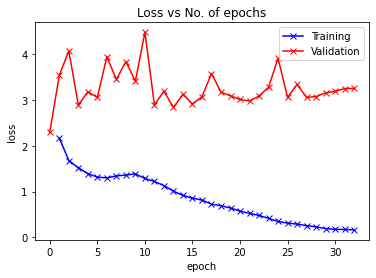

In [ ]:
plot_losses(history)

In [ ]:
def plot_lrs(history):
  lrs = np.concatenate([x.get("lrs", []) for x in history])
  plt.plot(lrs)
  plt.xlabel("Batch no.")
  plt.ylabel("Learning rate")
  plt.title("Learning Rate vs Batch no.")

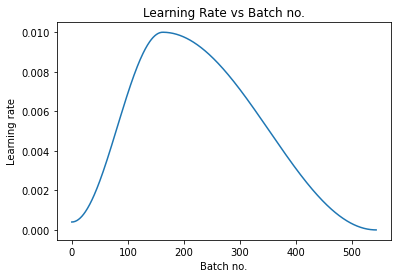

In [ ]:
plot_lrs(history)

In [ ]:
def predict_image(img, model):
  'convert to a batch of 1'
  xb = to_device(img.unsqueeze(0), device)
  #get predictions from model
  yb = model(xb)
  #pick index with max prob.
  _,preds = torch.max(yb, dim=1)
  #retrieve the class label
  return train_ds.classes[preds[0].item()]
  

label: horse . Predicted: deer


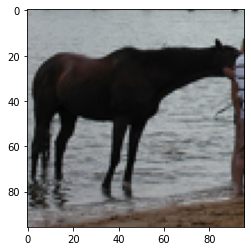

In [ ]:
img, label = valid_ds[0]
plt.imshow(img.permute(1,2,0).clamp(0,1))
print("label:", train_ds.classes[label], ". Predicted:", predict_image(img, model))


label: truck . Predicted: airplane


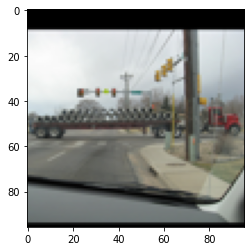

In [ ]:
img, label = valid_ds[1002]
plt.imshow(img.permute(1,2,0).clamp(0,1))
print("label:", train_ds.classes[label], ". Predicted:", predict_image(img, model))


label: deer . Predicted: deer


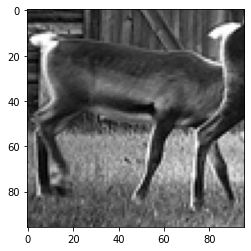

In [ ]:
img, label = valid_ds[1200]
plt.imshow(img.permute(1,2,0).clamp(0,1))
print("label:", train_ds.classes[label], ". Predicted:", predict_image(img, model))


In [ ]:
torch.save(model.state_dict(), "stl10-resnet9.pth")